# CIFAR-10 Dataset

Loading the dataset

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Printing the shape of the training and testing images

In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Printing the shape of the labels



In [ ]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

Printing the total number of classes (the unique numbers from the train labels)

In [ ]:
import numpy as np

classes = np.unique(y_train)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Creating a dictionary with the names of the classes

In [ ]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Displaying the first image in the training and the test data

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


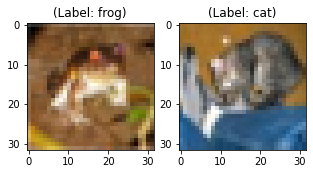

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
index = 0
plt.subplot(121)
curr_img = np.reshape(x_train[index], (32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_train[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

# Display the first image in testing data
index = 0
plt.subplot(122)
curr_img = np.reshape(x_test[index],(32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_test[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

## Visualizing the data

Checking the minimum and the maximum values of the training images

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

Normalizing the pixels between 0 and 1 inclusive

In [ ]:
x_train_normalized = x_train/np.max(x_train)

np.min(x_train_normalized),np.max(x_train_normalized)

(0.0, 1.0)

In [ ]:
x_train_normalized.shape

(50000, 32, 32, 3)

Reshaping the image dimensions from three to one (flattening the images)

In [ ]:
from functools import reduce

n_cols = reduce((lambda x, y: x * y), x_train_normalized.shape[1:])
print(n_cols)

x_train_flat = x_train_normalized.reshape(-1, n_cols)
x_train_flat.shape

3072


(50000, 3072)

Creating a DataFrame that holds the pixel values of the images with their respective labels in a row-column format

The shape should be (50000, 3073) (3072+1 because of the added labels) 

In [ ]:
feat_cols = ['pixel{}'.format(str(i)) for i in range(x_train_flat.shape[1])]

import pandas as pd

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

df_cifar['label'] = y_train
df_cifar.shape

(50000, 3073)

In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

PCA - keeping 3 components, then applying `fit_transform` on the training data

In [ ]:
from sklearn.decomposition import PCA

pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

Converting from a numpy array to a pandas DataFrame

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

,principal component 1,principal component 2,principal component 3,y
0,-6.401018,2.729039,1.501710,6
1,0.829783,-0.949943,6.003751,9
2,7.730200,-11.522102,-2.753618,9
3,-10.347817,0.010738,1.101017,4
4,-2.625651,-4.969240,1.034589,1


Printing the **variance**

In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144 0.06694414]


Visualizing the CIFAR-10 data in two-dimensions using PC1 and PC2

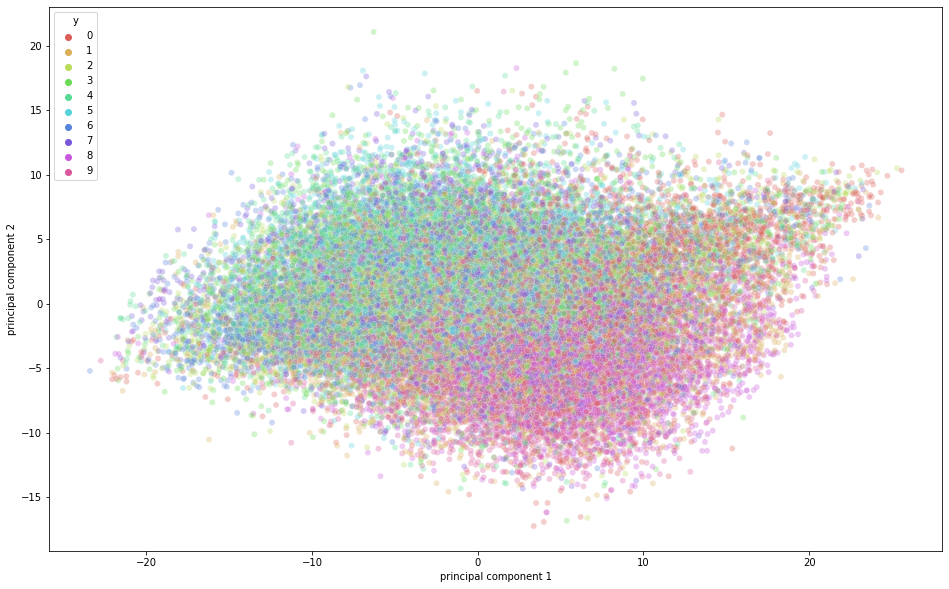

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="y",
    palette=sns.color_palette('hls', 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

Plot for PC2 vs PC3

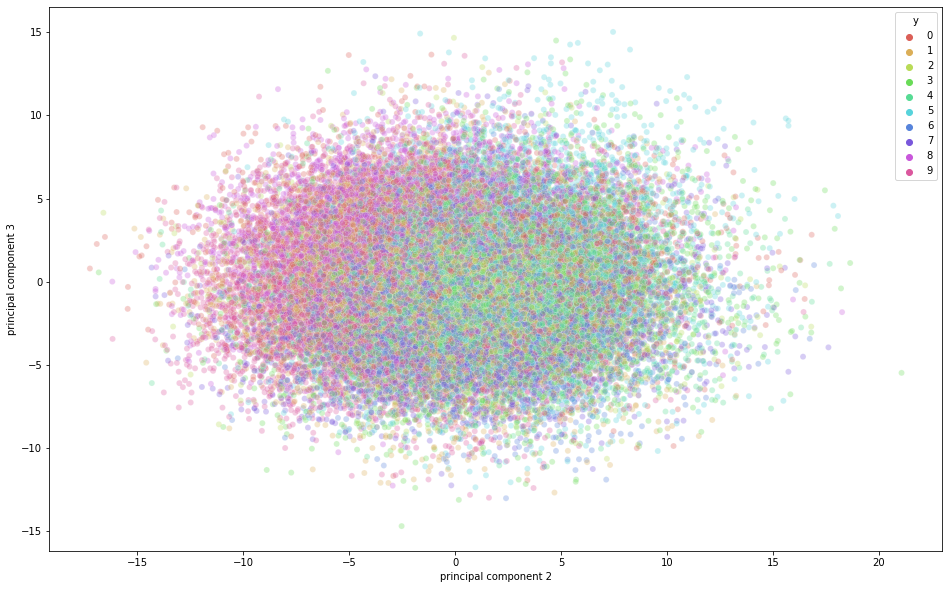

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 2', y='principal component 3',
    hue="y",
    palette=sns.color_palette('hls', 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)